# DataJoint Workflow for Neuropixels Analysis with Kilosort

+ This notebook will describe the steps for interacting with the data processed with the workflow.

In [1]:
import os
os.chdir('..')

In [7]:
import datajoint as dj
import matplotlib.pyplot as plt
import numpy as np

from workflow.pipeline import lab, subject, session, ephys, probe

## Workflow architecture

+ This workflow is assembled from 4 DataJoint elements:
     + [element-lab](https://github.com/datajoint/element-lab)
     + [element-animal](https://github.com/datajoint/element-animal)
     + [element-session](https://github.com/datajoint/element-session)
     + [element-array-ephys](https://github.com/datajoint/element-array-ephys)

+ Below is the diagram describing the core components of the fully assembled pipeline.


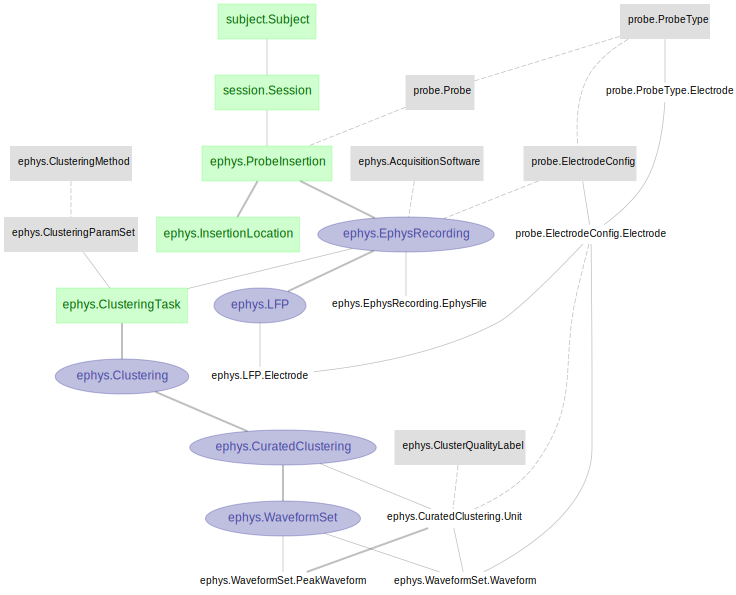

In [10]:
dj.Diagram(subject.Subject) + dj.Diagram(session.Session) + dj.Diagram(probe) + dj.Diagram(ephys)

## Browsing the data with DataJoint query and fetch 

+ DataJoint provides abundant functions to query data and fetch. For a detailed tutorials, visit our [general tutorial site](https://playground.datajoint.io/)

### `subject.Subject` and `session.Session` tables

In [11]:
subject.Subject()

subject,sex,subject_birth_date,subject_description
anna,M,2021-10-06,""""""
subject2,M,2021-10-04,""""""
subject3,M,2021-09-28,""""""
subject5,M,2021-09-29,""""""


In [12]:
session_key = (session.Session & 'subject="subject5"' & 'session_datetime = "2020-05-12 04:13:07"').fetch1('KEY')

### `ephys.ProbeInsertion` and `ephys.EphysRecording` tables

+ These tables stores the probe recordings within a particular session from one or more probes.

In [14]:
ephys.ProbeInsertion & session_key

subject,session_datetime,insertion_number,probe unique identifier for this model of probe (e.g. serial number)
subject5,2020-05-12 04:13:07,1,714000838
subject5,2020-05-12 04:13:07,2,262716621


In [15]:
ephys.EphysRecording & session_key

subject,session_datetime,insertion_number,electrode_config_hash,acq_software,sampling_rate (Hz),recording_datetime datetime of the recording from this probe,recording_duration (seconds) duration of the recording from this probe
subject5,2020-05-12 04:13:07,1,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,SpikeGLX,30000.0,2018-07-03 20:32:28,338.666
subject5,2020-05-12 04:13:07,2,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,SpikeGLX,30000.0,2018-07-03 20:32:28,339.384


### `ephys.ClusteringTask` , `ephys.Clustering`

+ Spike-sorting is performed on a per-probe basis with the details stored in `ClusteringTask` and `Clustering`

In [16]:
ephys.ClusteringTask * ephys.Clustering & session_key

subject,session_datetime,insertion_number,paramset_idx,clustering_output_dir clustering output directory relative to the clustering root data directory,"task_mode 'load': load computed analysis results, 'trigger': trigger computation",clustering_time time of generation of this set of clustering results,package_version
subject5,2020-05-12 04:13:07,1,0,subject5/session1/probe_1/kilosort2-5_0,trigger,2021-10-06 00:09:23,
subject5,2020-05-12 04:13:07,2,0,subject5/session1/probe_2/kilosort2-5_0,trigger,2021-10-06 00:41:45,


### Spike-sorting results are stored in `ephys.CuratedClustering`,  `ephys.WaveformSet.Waveform`

In [17]:
ephys.CuratedClustering.Unit & session_key

subject,session_datetime,insertion_number,paramset_idx,unit,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0",cluster_quality_label,spike_count how many spikes in this recording for this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"
subject5,2020-05-12 04:13:07,1,0,0,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,18,mua,18,=BLOB=,=BLOB=,=BLOB=
subject5,2020-05-12 04:13:07,1,0,1,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,0,mua,960,=BLOB=,=BLOB=,=BLOB=
subject5,2020-05-12 04:13:07,1,0,2,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,38,mua,93,=BLOB=,=BLOB=,=BLOB=
subject5,2020-05-12 04:13:07,1,0,3,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,46,mua,2086,=BLOB=,=BLOB=,=BLOB=
subject5,2020-05-12 04:13:07,1,0,4,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,56,good,570,=BLOB=,=BLOB=,=BLOB=
subject5,2020-05-12 04:13:07,1,0,5,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,56,mua,49,=BLOB=,=BLOB=,=BLOB=
subject5,2020-05-12 04:13:07,1,0,6,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,58,mua,641,=BLOB=,=BLOB=,=BLOB=


Let's pick one probe insertion and one `curation_id`, and further inspect the clustering results.

In [20]:
curation_key = (ephys.CuratedClustering & session_key & 'insertion_number = 1' & 'paramset_idx=0').fetch1('KEY')

In [21]:
ephys.CuratedClustering.Unit & curation_key

subject,session_datetime,insertion_number,paramset_idx,unit,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0",cluster_quality_label,spike_count how many spikes in this recording for this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"
subject5,2020-05-12 04:13:07,1,0,0,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,18,mua,18,=BLOB=,=BLOB=,=BLOB=
subject5,2020-05-12 04:13:07,1,0,1,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,0,mua,960,=BLOB=,=BLOB=,=BLOB=
subject5,2020-05-12 04:13:07,1,0,2,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,38,mua,93,=BLOB=,=BLOB=,=BLOB=
subject5,2020-05-12 04:13:07,1,0,3,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,46,mua,2086,=BLOB=,=BLOB=,=BLOB=
subject5,2020-05-12 04:13:07,1,0,4,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,56,good,570,=BLOB=,=BLOB=,=BLOB=
subject5,2020-05-12 04:13:07,1,0,5,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,56,mua,49,=BLOB=,=BLOB=,=BLOB=
subject5,2020-05-12 04:13:07,1,0,6,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,58,mua,641,=BLOB=,=BLOB=,=BLOB=


### Generate a raster plot for the "good" units

In [22]:
unit_key = ephys.CuratedClustering.Unit & curation_key & 'cluster_quality_label = "good"'

In [23]:
units, unit_spiketimes = unit_key.fetch('unit', 'spike_times')

In [24]:
x = np.hstack(unit_spiketimes)
y = np.hstack([np.full_like(s, u) for u, s in zip(units, unit_spiketimes)])

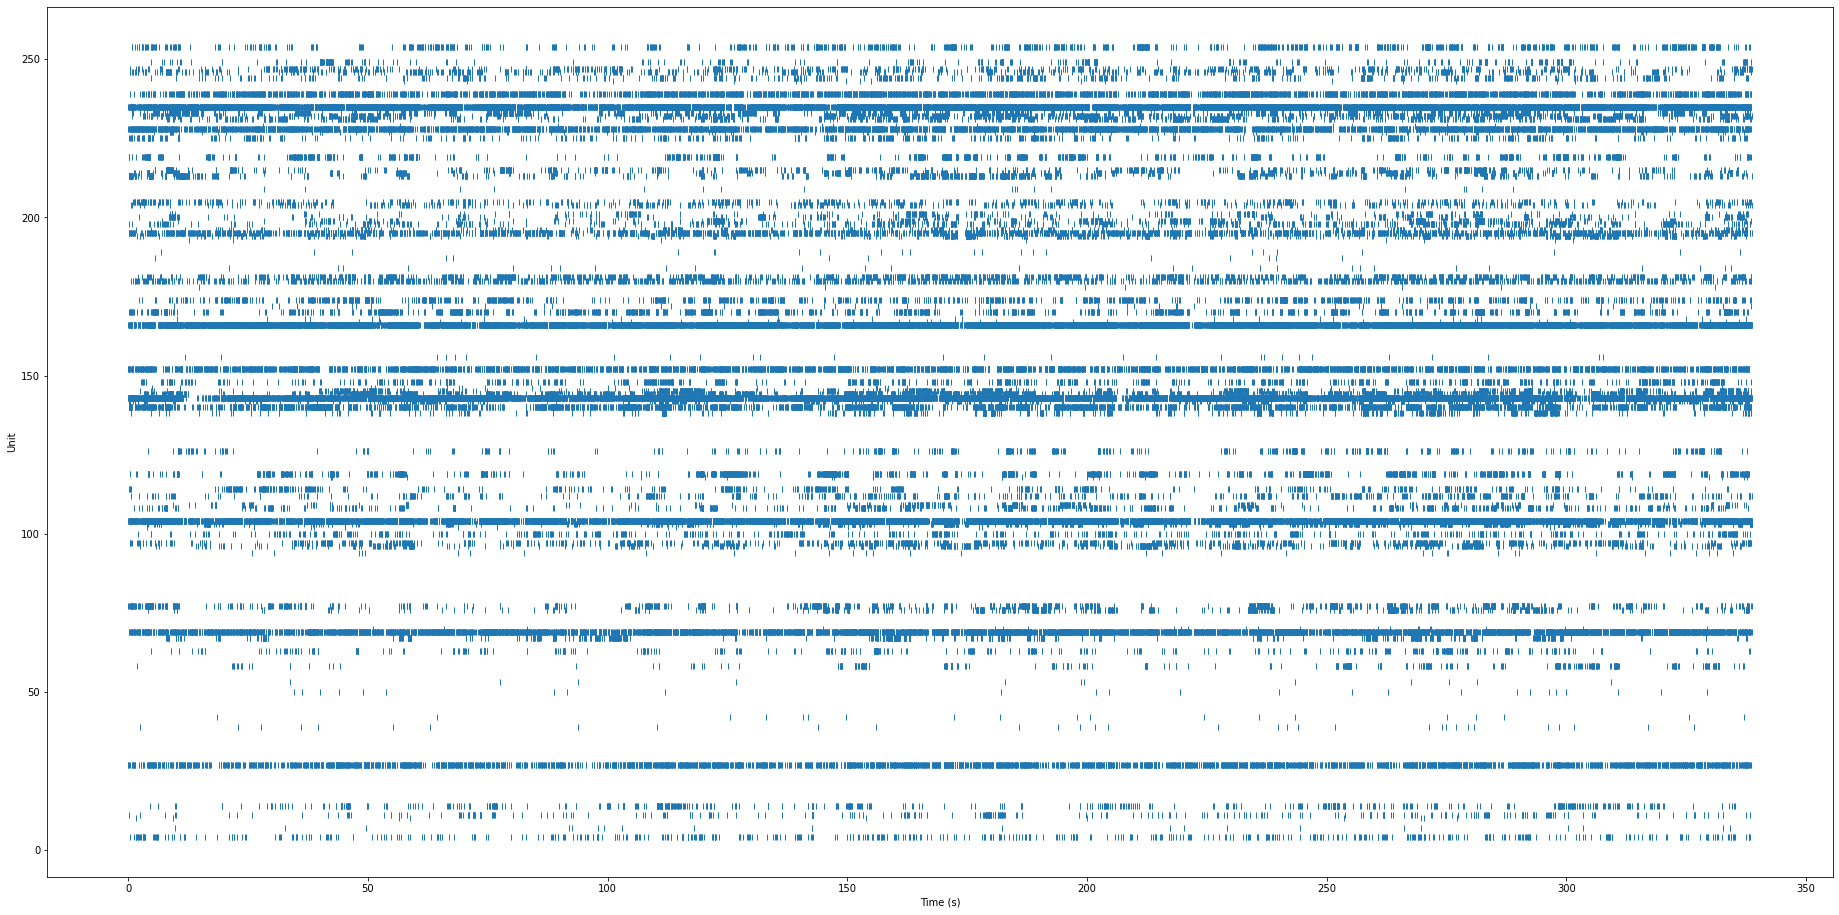

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(32, 16))
ax.plot(x, y, '|')
ax.set_xlabel('Time (s)');
ax.set_ylabel('Unit');

### Plot waveform of a unit

In [28]:
unit_key = (ephys.CuratedClustering.Unit & curation_key & 'unit = 1').fetch1('KEY')

In [30]:
ephys.CuratedClustering.Unit * ephys.WaveformSet.Waveform & unit_key

subject,session_datetime,insertion_number,paramset_idx,unit,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0",cluster_quality_label,spike_count how many spikes in this recording for this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording",spike_sites array of electrode associated with each spike,"spike_depths (um) array of depths associated with each spike, relative to the (0, 0) of the probe"
subject5,2020-05-12 04:13:07,1,0,1,8d4cc6d8-a02d-42c8-bf27-7459c39ea0ee,neuropixels 1.0 - 3A,0,mua,960,=BLOB=,=BLOB=,=BLOB=


In [ ]:
unit_data = (ephys.CuratedClustering.Unit * ephys.WaveformSet.PeakWaveform & unit_key).fetch1()

In [ ]:
unit_data

In [ ]:
sampling_rate = (ephys.EphysRecording & curation_key).fetch1('sampling_rate')/1000 # in kHz
plt.plot(np.r_[:unit_data['peak_electrode_waveform'].size] * 1/sampling_rate, unit_data['peak_electrode_waveform'])
plt.xlabel('Time (ms)');
plt.ylabel(r'Voltage ($\mu$V)');

## Summary
This notebook highlights the major tables in the workflow and visualize some of the processed results. 